# Part I - Ford GoBike System Data Exploration
## by Sandra Barasa

## Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area, with data showing:
* Duration of the trip in seconds.
* Start and end time of the trips.
* Start and end station names, IDs, latitudes and longitudes.
* Bike IDs.
* User Type ie Subscriber or Customer.
* Members' birth year and gender.
* Whether the bike was used for the whole trip or not.


## Preliminary Wrangling


In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

### Gathering Data

In [2]:
df = pd.read_csv('fordgobike-tripdata.csv')
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


### Assessing Data

In [3]:
#Assessing total number of rows and columns
df.shape

(183412, 16)

In [4]:
#Assessing data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
#Checking for duplicated values
df.duplicated().sum()

0

In [6]:
#Checking for null values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
df[df['start_station_id'].isnull() == True]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.9320,2019-02-28 21:24:23.7380,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.2730,2019-02-28 18:53:46.7270,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.5290,2019-02-28 17:13:09.4310,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.9340,2019-02-28 16:38:31.3320,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.1310,2019-02-28 12:38:46.3290,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176154,1447,2019-02-02 12:03:04.5440,2019-02-02 12:27:12.2670,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.93,4249,Customer,1984.0,Male,No
179730,309,2019-02-01 12:59:45.9690,2019-02-01 13:04:55.4260,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4249,Customer,1987.0,Female,No
179970,659,2019-02-01 12:17:37.6750,2019-02-01 12:28:37.0140,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.94,4092,Subscriber,1999.0,Female,No
180106,2013,2019-02-01 11:33:55.1470,2019-02-01 12:07:28.9400,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4251,Customer,1990.0,Female,No


In [8]:
df[df['member_birth_year'].isnull() == True]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183354,449,2019-02-01 01:35:07.6630,2019-02-01 01:42:36.8780,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,253.0,Haste St at College Ave,37.866418,-122.253799,5430,Customer,NaN,NaN,No
183356,795,2019-02-01 01:25:50.3660,2019-02-01 01:39:05.9500,368.0,Myrtle St at Polk St,37.785434,-122.419622,125.0,20th St at Bryant St,37.759200,-122.409851,5400,Subscriber,NaN,NaN,No
183363,673,2019-02-01 01:12:24.4200,2019-02-01 01:23:37.6450,75.0,Market St at Franklin St,37.773793,-122.421239,133.0,Valencia St at 22nd St,37.755213,-122.420975,5166,Customer,NaN,NaN,No
183371,196,2019-02-01 01:08:38.6410,2019-02-01 01:11:54.9490,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No


In [9]:
df[df['member_gender'].isnull() == True]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183354,449,2019-02-01 01:35:07.6630,2019-02-01 01:42:36.8780,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,253.0,Haste St at College Ave,37.866418,-122.253799,5430,Customer,NaN,NaN,No
183356,795,2019-02-01 01:25:50.3660,2019-02-01 01:39:05.9500,368.0,Myrtle St at Polk St,37.785434,-122.419622,125.0,20th St at Bryant St,37.759200,-122.409851,5400,Subscriber,NaN,NaN,No
183363,673,2019-02-01 01:12:24.4200,2019-02-01 01:23:37.6450,75.0,Market St at Franklin St,37.773793,-122.421239,133.0,Valencia St at 22nd St,37.755213,-122.420975,5166,Customer,NaN,NaN,No
183371,196,2019-02-01 01:08:38.6410,2019-02-01 01:11:54.9490,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No


In [10]:
#Assessing the breakdown of gender totals
df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [11]:
#Assessing the breakdown of user type totals
df['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [12]:
#Assessing the breakdown of bike share for all trip totals
df['bike_share_for_all_trip'].value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [13]:
#Assessing the descriptive statistics of the data
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


**Quality Issues**

* Incorrect data type for columns 'start_time' and 'end_time' - should be datetime
* Missing values in columns: start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender
* Incorrect data type for columns 'user_type', 'member_gender' and 'bike_share_for_all_trip' - should be categorical data 
* New column to show the day of the week when bikes were used
* Incorrect data type for the column 'member_birth_year' -Should be int; Add a column that shows member ages.

### Cleaning Data

In [14]:
#Make a copy of the original data first
df1 = df.copy()

#### Issue 1: Converting the datatype for the columns 'start_time' and 'end_time' to datetime

##### Code

In [15]:
df1['start_time'] = pd.to_datetime(df1['start_time'])
df1['end_time'] = pd.to_datetime(df1['end_time'])

##### Test

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

#### Issue 2: Dropping all missing values in columns: start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender

##### Code

In [17]:
df1.dropna(axis = 0, inplace = True)

##### Test

In [18]:
df1.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [19]:
df1.shape

(174952, 16)

#### Issue 3: Converting the columns 'user_type', 'member_gender' and 'bike_share_for_all_trip'  into categorical data

##### Code

In [20]:
var_dict = {'user_type': ['Subscriber','Customer'],
                    'member_gender': ['Male', 'Female', 'Other'],
                    'bike_share_for_all_trip': ['No', 'Yes']}

for var in var_dict:
    x = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = var_dict[var])
    df1[var] = df1[var].astype(x)

##### Test

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

#### Issue 4: Creating a new column that shows days of the week and ordering the days in chronological order

##### Code

In [22]:
#Creating a new column with days of the week
df1['start_day'] = df1['start_time'].dt.day_name()

In [23]:
#Ordering the values in chronological order
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
days_order = pd.api.types.CategoricalDtype(ordered = True, categories = days)
df1['start_day'] = df1['start_day'].astype(days_order)

##### Test

In [24]:
df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,Thursday


#### Issue 5: Changing the data type for the column 'member_birth_year' from float to int and adding a column that shows members' age

##### Code

In [25]:
#Changing the datatype to int
df1['member_birth_year'] = df1['member_birth_year'].astype(int)

In [26]:
#Adding a column to show age
df1['member_age'] = 2022 - df1['member_birth_year']

##### Test

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [28]:
df1.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,Thursday,38
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,Thursday,50
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,Thursday,33
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,Thursday,48
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,Thursday,63


### What is the structure of your dataset?

- There are 174,952 rows and 18 columns, with the columns showing data on **'duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude','start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_age', 'member_gender', 'bike_share_for_all_trip' and 'start_day'**

### What is/are the main feature(s) of interest in your dataset?

- I am most interested in determining which factors would influence the trip duration of an individual.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- I expect that user type, gender, age and day of the week will have an effect on the duration of the trip.

## Univariate Exploration

#### Question: What is the distribution of the main variable of interest: duration?

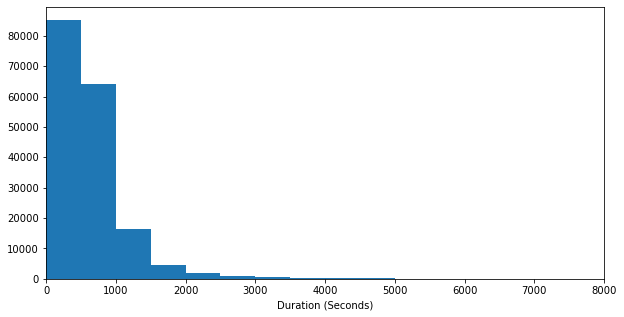

In [29]:
binsize = 500
bins = np.arange(0, df1['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df1, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (Seconds)')
plt.xlim((0,8000))
plt.show()

In [30]:
np.log10(df1['duration_sec'].describe())

count    5.242919
mean     2.847574
std      3.215427
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

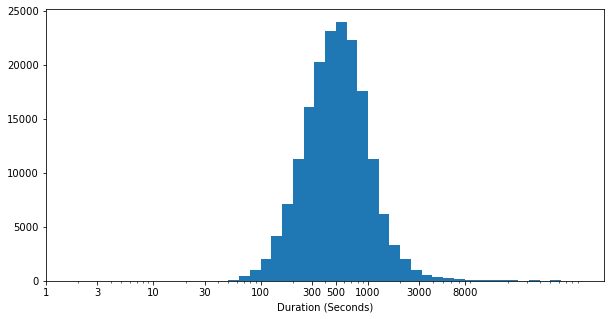

In [31]:
bins = 10 ** np.arange(1, 5+0.1, 0.1)

#Generate the x-ticks to apply
ticks = [1, 3, 10, 30, 100, 300, 500, 1000, 3000, 8000]
# Convert the ticks into string values to be displayed dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

#Plot the histogram
plt.figure(figsize=[10, 5])
plt.hist(data = df1, x='duration_sec', bins=bins);
plt.xlabel('Duration (Seconds)')

#The argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')

#Apply x-ticks
plt.xticks(ticks, labels);

##### Observation

Initially, the data was skewed to the right with a long tail. When transformed into a lognormal distribution, the data is revealed to be unimodal with its peak around 600 seconds.

#### Question: What is the distribution of the other variables of interest? i.e. User Type, Gender, Start Day, etc

In [32]:
#Creating a function that will avoid code repetition when plotting the graphs
def bar_chart(dataframe):
    plt.figure(figsize=[5, 5]);
    base_color = sns.color_palette()[0]
    value = input()
    
    return sns.countplot(data = dataframe, x = value, color = base_color);

user_type


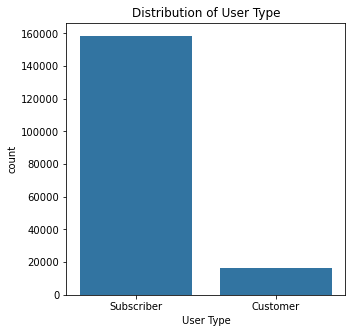

In [33]:
bar_chart(df1);
plt.title('Distribution of User Type');
plt.xlabel('User Type');

##### Observation:
* There are more subscribers than there are customers

member_gender


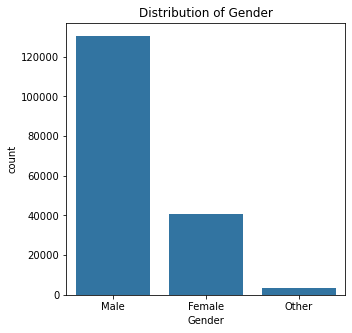

In [34]:
bar_chart(df1);
plt.title('Distribution of Gender');
plt.xlabel('Member Gender');

##### Observation:
* There are more males than females and 'other' genders.

start_day


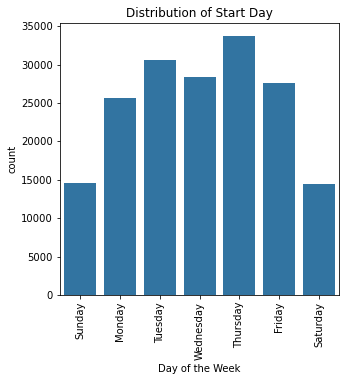

In [35]:
bar_chart(df1);
plt.xticks(rotation = 90);
plt.title('Distribution of Start Day');
plt.xlabel('Day of the Week');

##### Observation:
* Thursday is the most popular day for starting the rides, followed by Tuesday and Wednesday.

bike_share_for_all_trip


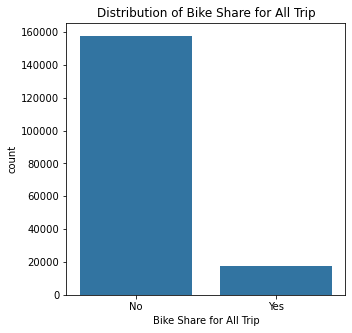

In [36]:
bar_chart(df1);
plt.title('Distribution of Bike Share for All Trip');
plt.xlabel('Bike Share for All Trip');

##### Observation:
* A majority of the members do not use the bikes for the whole trip.

member_age


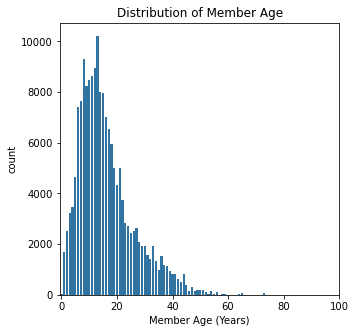

In [37]:
bar_chart(df1);
ticks = [0, 20, 40, 60, 80, 100]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels);
plt.title('Distribution of Member Age');
plt.xlabel('Member Age (Years)');

In [38]:
np.log10(df1['member_age'].describe())

count    5.242919
mean     1.570506
std      1.005126
min      1.322219
25%      1.477121
50%      1.544068
75%      1.623249
max      2.158362
Name: member_age, dtype: float64

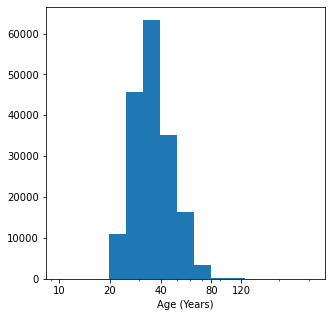

In [39]:
bins = 10 ** np.arange(1, 2.5+0.1, 0.1)

#Generate the x-ticks to apply
ticks = [10, 20, 40, 80, 120]
# Convert the ticks into string values to be displayed dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

#Plot the histogram
plt.figure(figsize=[5, 5])
plt.hist(data = df1, x='member_age', bins=bins);
plt.xlabel('Age (Years)')

#The argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')

#Apply x-ticks
plt.xticks(ticks, labels);

##### Observation:
* Age is mainly distributed between 30 - 40 years old

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

* There were no unusual points in my variables of interest.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

* The distribution for duration was skewed to the right with a long tail. This required transformation into a lognormal dirstibution, which revealed that the data was in fact unimodal in nature.

## Bivariate Exploration

#### Question: What is the relationship between the numerical features of my data?

In [40]:
numeric_variables = ['duration_sec', 'member_age']

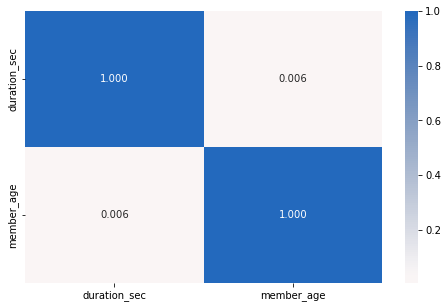

In [41]:
# correlation plot for numeric variables
plt.figure(figsize = [8, 5])
sns.heatmap(df1[numeric_variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

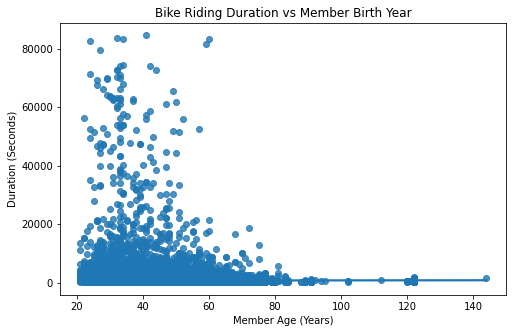

In [42]:
#Plotting a scatter plot to give a better visualisation of the data
plt.figure(figsize=[8, 5]);
sns.regplot(data = df1, x = 'member_age', y = 'duration_sec');
plt.xlabel('Member Age (Years)');
plt.ylabel('Duration (Seconds)');
plt.title('Bike Riding Duration vs Member Birth Year');

##### Observation
- The heatmap shows that there is an almost zero positive correlation of 0.006 between the duration and member age variables.
- In terms of duration of bike riding, there is a high concentration of members between 0 and 20,000 seconds (5.5 hours). 
- We can see increases in the duration from people between the age 20 and 50 years old. This is expected as the younger generation are likely to be more energetic than the older generation.

#### Question: What is the relationship between duration and the qualitative features of the data?

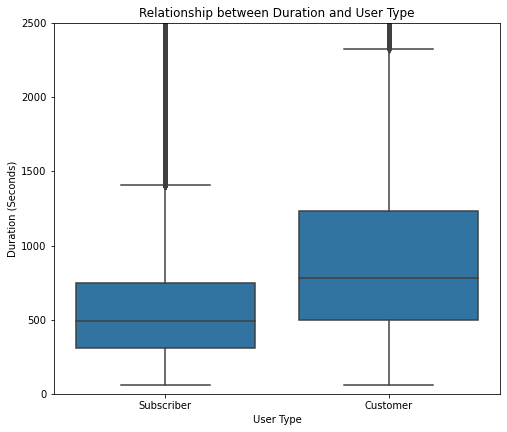

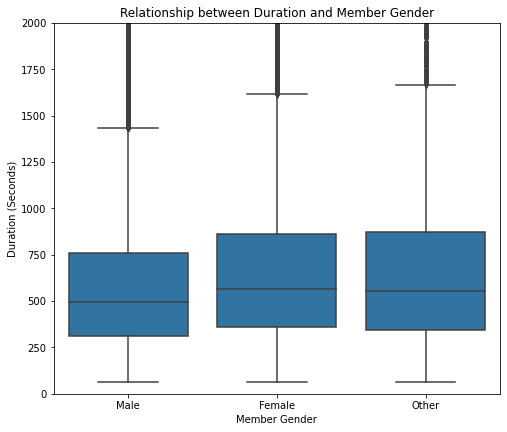

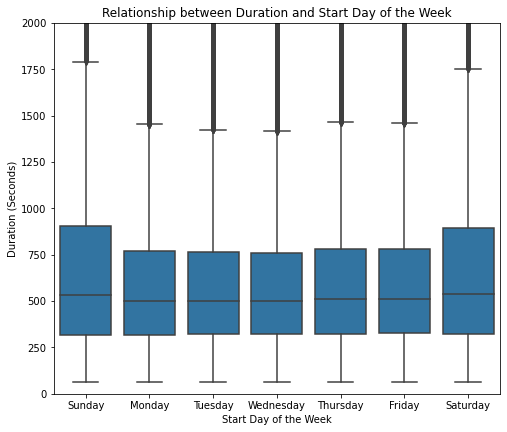

In [43]:
#Relationship between duration and user type
plt.figure(figsize = [8, 15])
plt.subplot(2,1,1)
base_color = sns.color_palette()[0]
sns.boxplot(data = df1, x = 'user_type', y = 'duration_sec', color = base_color);
plt.ylim(0, 2500);
plt.title('Relationship between Duration and User Type');
plt.xlabel('User Type')
plt.ylabel('Duration (Seconds)')

#Relationship between duration and member gender
plt.figure(figsize = [8, 15])
plt.subplot(2,1,1)
base_color = sns.color_palette()[0]
sns.boxplot(data = df1, x = 'member_gender', y = 'duration_sec', color = base_color);
plt.ylim(0, 2000);
plt.title('Relationship between Duration and Member Gender');
plt.xlabel('Member Gender')
plt.ylabel('Duration (Seconds)');

#Relationship between duration and start day of the week
plt.figure(figsize = [8, 15])
plt.subplot(2,1,1)
base_color = sns.color_palette()[0]
sns.boxplot(data = df1, x = 'start_day', y = 'duration_sec', color = base_color);
plt.ylim(0, 2000);
plt.title('Relationship between Duration and Start Day of the Week');
plt.xlabel('Start Day of the Week')
plt.ylabel('Duration (Seconds)');

##### Observation
On average:
- Customers ride for a longer duration than subscribers.
- Females have a longer duration, followed by 'other' and males.
- Saturday and Sunday record the highest duration of rides.

#### Question: Are there any relationships between the categorical features of my data?

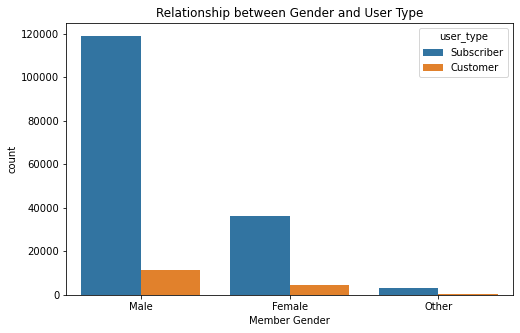

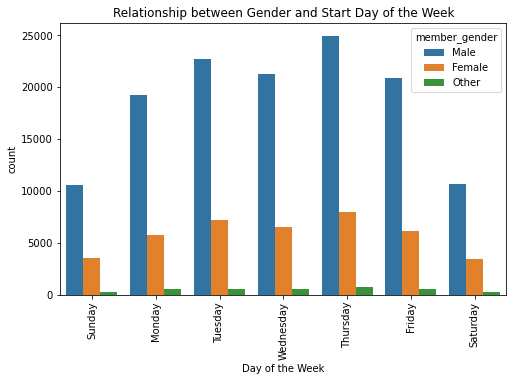

In [44]:
#Relationship between gender and user type
plt.figure(figsize=[8, 5]);
sns.countplot(data = df1, x = 'member_gender', hue = 'user_type');
plt.xlabel('Member Gender');
plt.title('Relationship between Gender and User Type');

#Relationship between gender and start day of the week
plt.figure(figsize=[8, 5]);
sns.countplot(data = df1, x = 'start_day', hue = 'member_gender');
plt.xlabel('Day of the Week');
plt.xticks(rotation = 90);
plt.title('Relationship between Gender and Start Day of the Week');

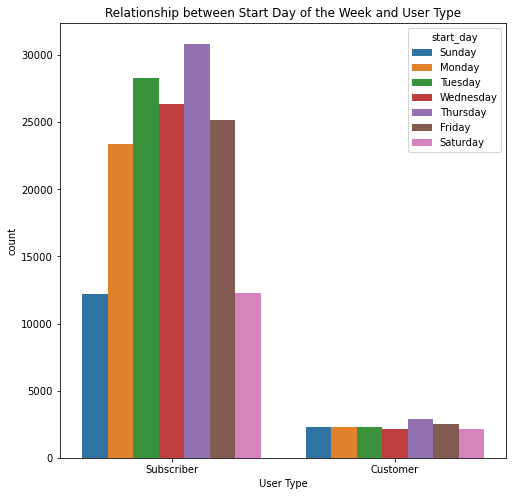

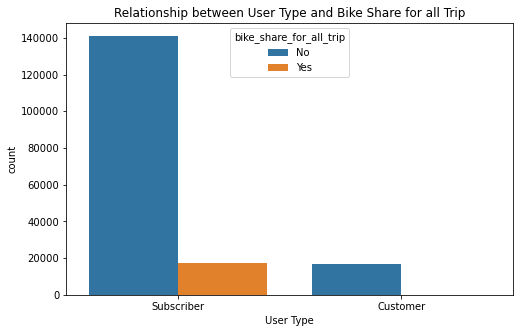

In [45]:
#Relationship between days of the week and user type
plt.figure(figsize=[8, 8]);
sns.countplot(data = df1, x = 'user_type', hue = 'start_day');
plt.xlabel('User Type');
plt.title('Relationship between Start Day of the Week and User Type');

#Relationship between user type and bike-share-for-all trip
plt.figure(figsize=[8, 5]);
sns.countplot(data = df1, x = 'user_type', hue = 'bike_share_for_all_trip');
plt.xlabel('User Type');
plt.title('Relationship between User Type and Bike Share for all Trip');

##### Observation

- Subscribers are generally more than customers, regardless of gender.
- Thursday is the most popular start day for bike riding across all genders.
- Subcribers ride bikes more on Thursdays and Tuesdays, whereas customers ride bikes more on Thursdays and Fridays.
- There are no customers that used the bikes only for their whole trip.

## Multivariate Exploration

#### Question: What is the duration of trips per user type, when plotted according to days of the week?

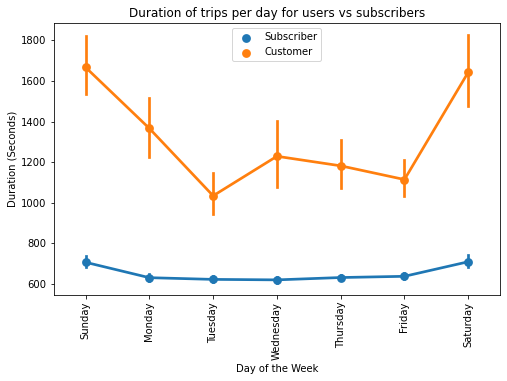

In [46]:
plt.figure(figsize=[8, 5]);
sns.pointplot(data = df1, x = 'start_day', y = 'duration_sec', hue = 'user_type')

plt.title('Duration of trips per day for users vs subscribers')
plt.xlabel('Day of the Week')
plt.xticks(rotation = 90)
plt.ylabel('Duration (Seconds)')
plt.legend(loc = 9);

##### Observation
- Despite subscribers being more than customers in our data, the plot shows that customers actually ride for longer periods of time than the subscribers.
- Saturday and Sunday give the longest duration of bike riding, regardless of whether one is a customer or a subscriber.

#### Question: What is the duration of trips per gender, when plotted according to days of the week?

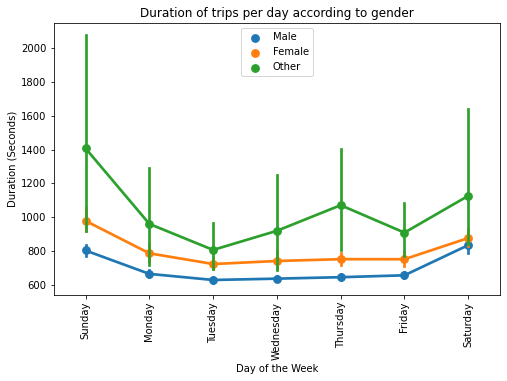

In [47]:
plt.figure(figsize=[8, 5]);
sns.pointplot(data = df1, x = 'start_day', y = 'duration_sec', hue = 'member_gender')

plt.title('Duration of trips per day according to gender')
plt.xlabel('Day of the Week')
plt.xticks(rotation = 90)
plt.ylabel('Duration (Seconds)')
plt.legend(loc = 9);

##### Observation:
- 'Other' category of gender rode the bikes for longer durations than the females and males, despite being the minority. The opposite is true for the males. i.e. Despite showing significantly high numbers, they on average, rode for the shortest duration of time.

#### Question: What is the duration of trips against age, when plotted according to days of the week?

In [48]:
#Get minimum age
print(df1['member_age'].min())
#Get maximum age
print(df1['member_age'].max())

21
144


In [49]:
#Grouping the ages
df1['age_group'] = df1['member_age'].apply(lambda x: '21 - 30' if 20<x<=30
                                                  else '31 - 40' if 30<x<=40
                                                  else '41 - 50' if 40<x<=50
                                                  else '51 - 60' if 50<x<=60
                                                  else '61+' if 60<=x
                                                       else x)
df1.age_group.value_counts()

31 - 40    76788
21 - 30    48176
41 - 50    30207
51 - 60    14000
61+         5781
Name: age_group, dtype: int64

<Figure size 576x360 with 0 Axes>

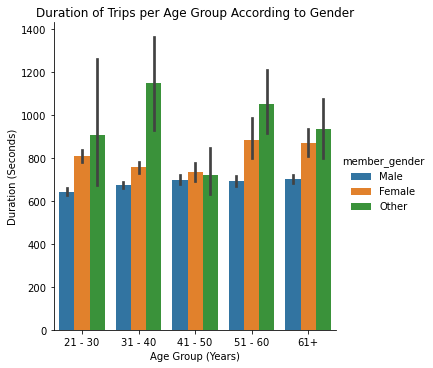

In [50]:
#Creating an ordered sequence for the age groups before plotting
ag = ['21 - 30', '31 - 40', '41 - 50', '51 - 60', '61+' ]
age_group_order = pd.api.types.CategoricalDtype(ordered = True, categories = ag)
df1['age_group'] = df1['age_group'].astype(age_group_order)

#Plotting the graph
plt.figure(figsize=[8, 5]);
sns.catplot(data = df1, x='age_group', y='duration_sec', hue='member_gender', kind = 'bar');
plt.title('Duration of Trips per Age Group According to Gender');
plt.xlabel('Age Group (Years)');
plt.ylabel('Duration (Seconds)');

##### Observation
The age groups that have the most active bike riders are as below:
- Male: 41 - 50 years
- Female: 51 - 60 years
- Other: 31 - 40 years

## Conclusions

My analysis began with an aim of determining which features had an impact on members' trip duration.The findings of this analysis and data visualisations are that:

* There are more males than females and 'other' genders.
* There are more subscribers than there are customers, yet customers ride for a longer duration than subscribers.
* Thursday is the most popular day for starting the rides, followed by Tuesday and Wednesday.
* Most members cycle between 0 and 20,000 seconds (0 - 5.5 hours), with a majority not using the bikes for the whole trip.
* There is a higher cycling duration from people between the age 20 and 50 years old. 
* Saturday and Sunday record the highest average duration of rides.
* 'Other' gender category have longer durations than females and males, despite being the minority. The opposite is true for the males. i.e. Despite showing significantly high numbers, they on average rode for the shortest duration of time.
* The age groups with the most active bike riders are: Male: 41 - 50 years, Female: 51 - 60 years, Other: 31 - 40 years

### Storing Final Data

In [51]:
df1.to_csv('fordbike_master.csv', index = False)